## Task 1 - Prediction using Supervised ML

## Problem Statement


#### Predict the percentage of a student based on the no. of hours of study.

## Simple Linear Regession

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### loading dataset

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualization 

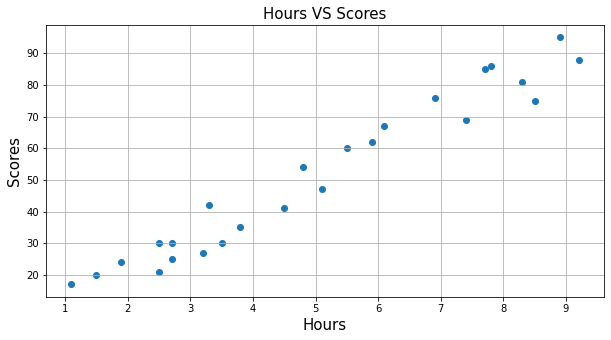

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours VS Scores',fontsize=15)
plt.grid()
plt.show()

##### - Here we can see there is positive correlation(linear relationship) between hours studied and percentage scores

### Prepare the data

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=9)

In [6]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (20, 1)
X_test shape: (5, 1)
y_train shape: (20,)
y_test shape: (5,)


### Training Model

In [7]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('beta1 is:',lr.coef_[0],'and beta0 is:',lr.intercept_)

beta1 is: 9.971854911234724 and beta0 is: 2.1957915598041353


### plotting regression line

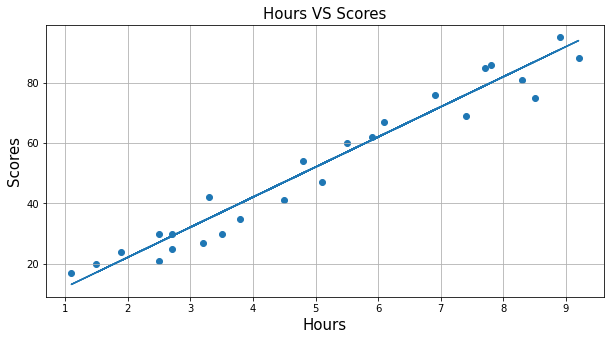

In [9]:
l = lr.coef_*X + lr.intercept_

plt.figure(figsize=(10,5))
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.plot(X,l)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours VS Scores',fontsize=15)
plt.grid()
plt.show()

### prediction on test data

In [10]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array([37.09728375, 29.11979982, 17.15357393, 86.95655831, 57.04099357])

In [11]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred

,Actual,Predicted
0,30,37.097284
1,25,29.119800
2,20,17.153574
3,75,86.956558
4,60,57.040994


### Evaluating Model

In [12]:
print('root mean squared error(RMSE) is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 

root mean squared error(RMSE) is: 6.740346194610265
Mean Absolute Error: 5.7958148752623


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [13]:
hrs = 9.25
self_pred = lr.predict(np.array(hrs).reshape(-1, 1))
print("No of Hours:",hrs)
print("Predicted Score",self_pred[0])

No of Hours: 9.25
Predicted Score 94.43544948872533
